In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

We chose: 99.527415590423
We chose: 100.25543380968855
We chose: 100.96550950552788
We chose: 100.16824161392418
We chose: 99.61819504061553
We chose: 99.18285231550587
We chose: 99.76217778289742
We chose: 99.97401835697752
We chose: 99.32861880703277
We chose: 100.8916986109334
We chose: 99.38581345517356
We chose: 100.03179353392838
We chose: 100.56558105327295
We chose: 100.46923684593081
We chose: 99.19045278959001
We chose: 100.0396549301025
We chose: 100.54339183854248
We chose: 99.77545875987657
We chose: 100.40644896642756
We chose: 100.23463684765828
We chose: 101.45373454848928
We chose: 100.93479895140891
We chose: 99.22280178307014
We chose: 98.44410037169175
We chose: 99.66048564367364
We chose: 100.48529578919141
We chose: 101.76282801005598
We chose: 98.86937163453189
We chose: 99.73792879591144
We chose: 99.2165459121321
We chose: 100.47413740538406
We chose: 99.39713147031107
We chose: 100.46787725194417
We chose: 100.35715496799564
We chose: 98.38127225625259
We chos

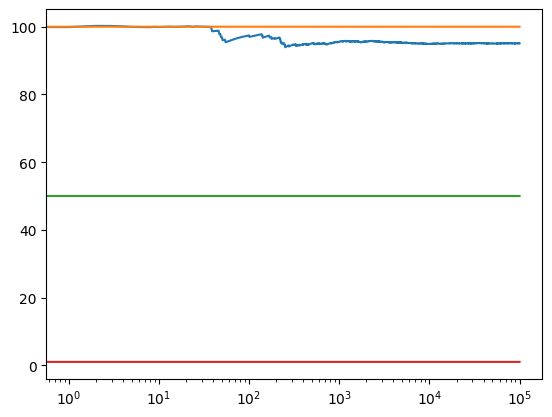

100.00103317862398
49.98177317171756
1.000547222146073


In [11]:
# Define Action class 
class Actions: 
    def __init__(self, m): 
    	self.m = m 
    	self.mean = 0
    	self.N = 0
    
    # Choose a random action 
    def choose(self): 
    	return np.random.randn() + self.m 
    
    # Update the action-value estimate 
    def update(self, x): 
    	self.N += 1
    	self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x 
    
    
def run_experiment(m1, m2, m3, eps, N): 
        	
    actions = [Actions(m1), Actions(m2), Actions(m3)] 
    
    data = np.empty(N) 
    	
    for i in range(N): 
    	# epsilon greedy 
    	p = np.random.random() 
    	if p < eps: 
        	j = np.random.choice(3) 
    	else: 
        	j = np.argmax([a.mean for a in actions]) 
    	x = actions[j].choose()
    	print(f'We chose: {x}')
    	actions[j].update(x) 
    
    	# for the plot 
    	data[i] = x 
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1) 
    
    # plot moving average ctr 
    plt.plot(cumulative_average) 
    plt.plot(np.ones(N)*m1) 
    plt.plot(np.ones(N)*m2) 
    plt.plot(np.ones(N)*m3) 
    plt.xscale('log') 
    plt.show() 
    
    for a in actions: 
    	print(a.mean) 
    
    return cumulative_average 
    

if __name__ == '__main__': 
    	
    c_1 = run_experiment(100, 50, 1, 0.1, 100000) 
    # c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000) 
    # c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000) 


In [92]:
# Two types of distribution functions: Normal distribution (N), Continuous uniform distribution (U)
# Student ID: 40340112032
# First button           N(2, 1)
# Second button          N(0, 2)
# Third button           N(-1, 1)
# Fourth button          N(3, 1) OR U(-3, 1)

def get_action(button=0):
    button += 1
    match button:
        case 1:
            return np.random.normal(loc=2, scale=1)
        case 2:
            return np.random.normal(loc=0, scale=2)
        case 3:
            return np.random.normal(loc=-1, scale=1)
        case 4:
            p = np.random.rand()
            if p > .3:
                return np.random.normal(loc=3, scale=2)
            else:
                return np.random.uniform(low=-3, high=1)
        case _:
            raise Exception(f"Sorry button should be between 1 and 4. You gave {button}")

In [45]:
get_action(4)

5.3477722652742

In [46]:
np.zeros(4)

array([0., 0., 0., 0.])

In [ ]:
# Value of each button
button_use = {1:0, 2:0, 3:0, 4:0}
button_scores = np.zeros(4)
N = 100
eps = 0.2

data = np.empty(N) 
    
for i in range(N): 
    # epsilon greedy 
    p = np.random.random() 
    if p < eps: 
        j = np.random.choice(4)
    else: 
        j = np.argmax(button_scores) 
    x = get_action(j)
    print(f'We chose: button number {j}')
    button_scores[j] = ((button_scores[j] * button_use[j]) + x) / button_use[j] + 1
    button_use[j]+=1


    # for the plot 
    data[i] = x 
cumulative_average = np.cumsum(data) / (np.arange(N) + 1) 

# plot moving average ctr 
plt.plot(cumulative_average) 
plt.plot(np.ones(N)*m1) 
plt.plot(np.ones(N)*m2) 
plt.plot(np.ones(N)*m3) 
plt.xscale('log') 
plt.show() 

for a in actions: 
    print(a.mean) 

return cumulative_average 

In [166]:
def runn(N=4000, eps=0.2, plot=True):

    button_use = {0:0, 1:0, 2:0, 3:0}
    button_scores = np.zeros(4)
    
    data = np.zeros(N) 
        
    for i in range(N): 
        p = np.random.random() 
        if p < eps: 
            j = np.random.choice(4)
        else: 
            j = np.argmax(button_scores)
        x = get_action(j)
        button_scores[j] = ((button_scores[j] * button_use[j]) + x) / (button_use[j] + 1)
        button_use[j]+=1
        
        data[i] = x 
        
    best_button = np.argmax(button_scores)
    best_score = button_scores[best_button]
    # print(f'The best button is: {best_button+1} with score: {best_score}')
    
    cum_mean = np.cumsum(data) / (np.arange(N) + 1) 
    if plot:
        plt.plot(cum_mean)
        plt.title(f'N={N} | Epsilon={eps}')
        plt.plot(button_scores[0]) 
        plt.plot(button_scores[1]) 
        plt.plot(button_scores[2]) 
        plt.plot(button_scores[3])
        plt.show()
    
    return best_score 

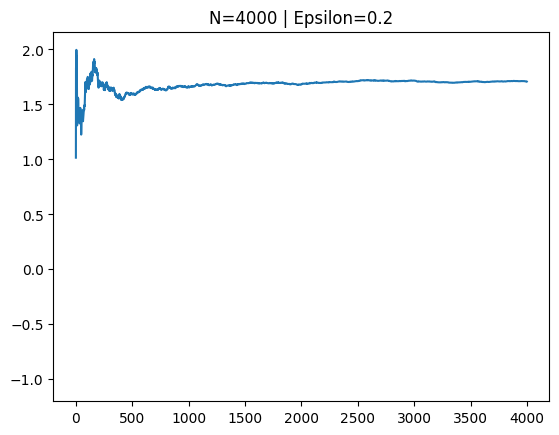

In [167]:
runn();

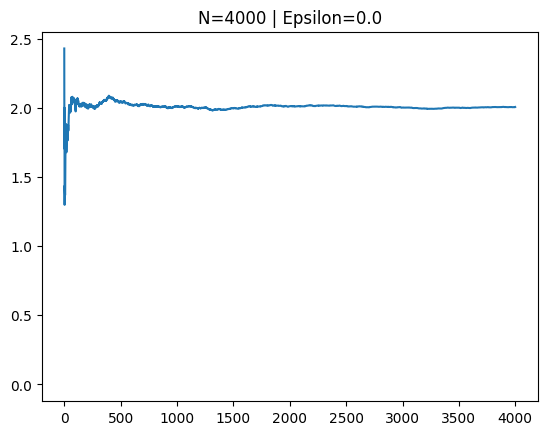

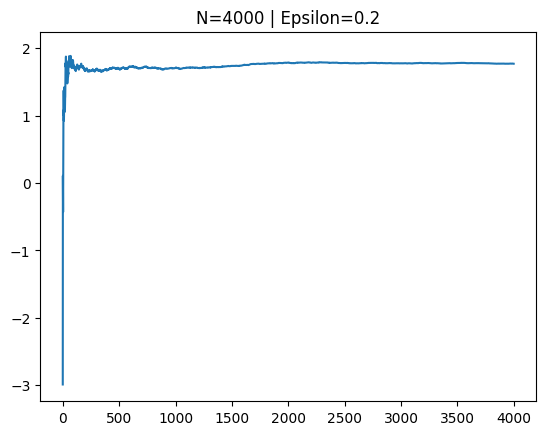

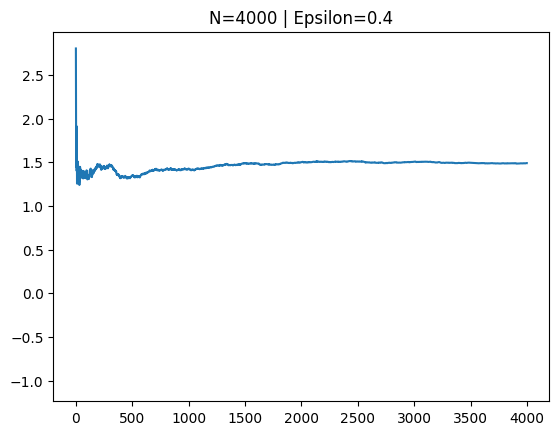

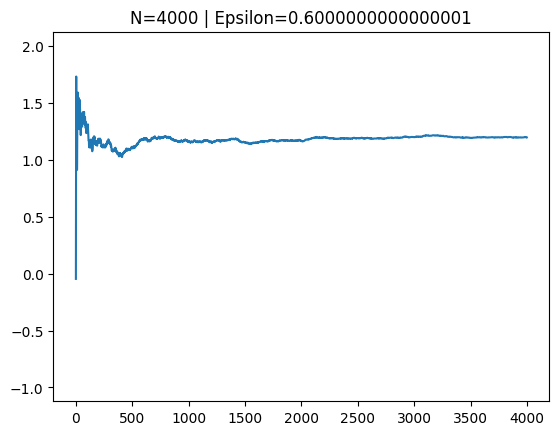

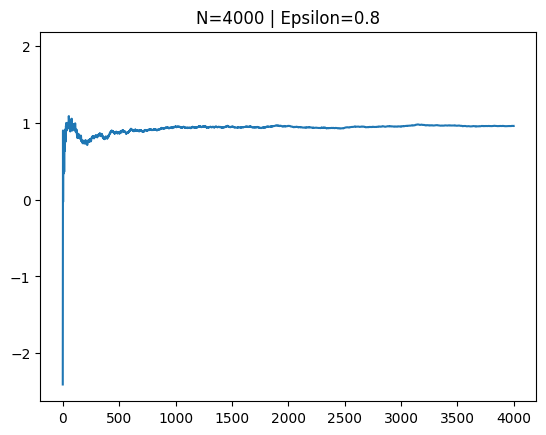

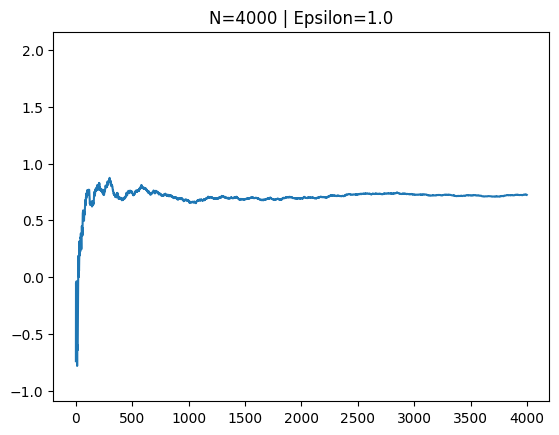

Best score yet: 2.020132834832023 with eps: 0.4


In [182]:
epsilon_lists = np.linspace(0, 1, 6)
score = 0
best_eps = 0
for i in epsilon_lists:
    n = runn(eps=i)
    if n > score:
        score = n
        best_eps = i

print(f'Best score yet: {score} with eps: {best_eps}')

In [188]:
def runn_alpha_beta(N=4000, eps=0.2, alpha = 1, beta = 1, plot=True):

    button_use = {0:0, 1:0, 2:0, 3:0}
    button_scores = np.zeros(4)
    
    data = np.zeros(N) 
        
    for i in range(N): 
        p = np.random.random() 
        if p < eps: 
            j = np.random.choice(4)
        else: 
            j = np.argmax(button_scores)
        x = get_action(j)
        if x >= 0:
            x *= alpha
        else:
            x *= beta
        button_scores[j] = ((button_scores[j] * button_use[j]) + x) / (button_use[j] + 1)
        button_use[j]+=1
        
        data[i] = x 
        
    best_button = np.argmax(button_scores)
    best_score = button_scores[best_button]
    # print(f'The best button is: {best_button+1} with score: {best_score}')
    
    cum_mean = np.cumsum(data) / (np.arange(N) + 1) 
    if plot:
        plt.plot(cum_mean)
        plt.title(f'N={N} | Epsilon={eps} | Alpha={alpha} | Beta={beta} | Button={best_button}')
        plt.plot(button_scores[0]) 
        plt.plot(button_scores[1]) 
        plt.plot(button_scores[2]) 
        plt.plot(button_scores[3])
        plt.show()
    
    return best_score 

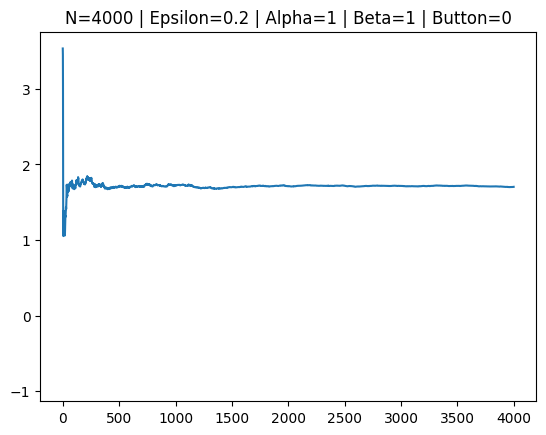

1.992251295236891

In [189]:
runn_alpha_beta()

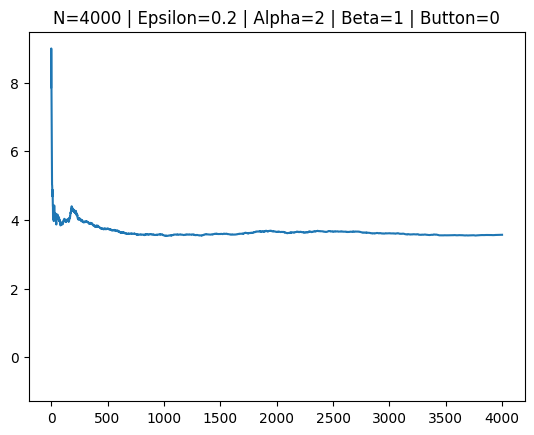

4.00910294941045

In [190]:
runn_alpha_beta(alpha=2, beta=1)

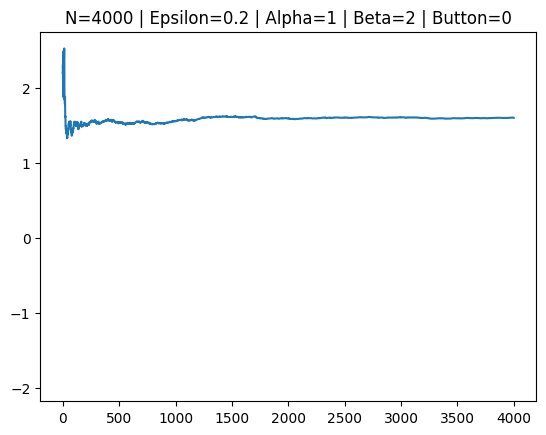

1.9882182402910493

In [191]:
runn_alpha_beta(alpha=1, beta=2)

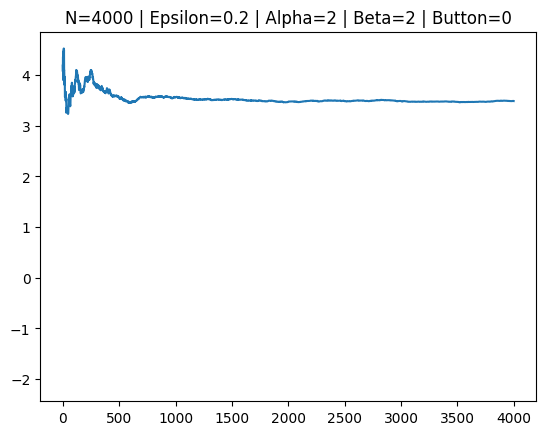

3.998407848220583

In [192]:
runn_alpha_beta(alpha=2, beta=2)